<a href="https://colab.research.google.com/github/kgorfu/MyCode/blob/master/TRAIN_AWS_Part_II_Day_6_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Deep Learning - Review**

---
### **Description**
In today's lab, you will work on two projects using Deep Learning to classify variations on the MNIST digits dataset that involve more complex imagery. You will be asked to apply what you have learned over the last two days and make choices of your own to complete these projects. We recommend that you have the Days 3 - 4 notebooks and the cheatsheets open as reference so you can look up anything you are unsure of.

<br>

### **Lab Structure**
**Part 1**: [Analysis of the Kuzushiji-MNIST Dataset](#p1)

> **Part 1.1**: [The Initial Attempt](#p1.1)

> **Part 1.2**: [Improvements](#p1.2)

**Part 2**: [Analysis of the MNIST Fashion Dataset](#p2)

> **Part 2.1**: [The Initial Attempt](#p2.1)

> **Part 2.2**: [Improvements](#p2.2)

**Part 3**: [Analysis of Mineral Hardness](#p3)

> **Part 3.1**: [The Initial Attempt](#p3.1)

> **Part 3.2**: [Improvements](#p3.2)

**Part 4**: [Analysis of the Country211 Dataset](#p4)

> **Part 4.1**: [The Initial Attempt](#p4.1)

> **Part 4.2**: [Improvements](#p4.2)

<br>




### **Learning Objectives**
By the end of this lab, you will have trained, implemented, and evaluated a deep learning image classification model that is able to achieve over 85% accuracy on the validation dataset.

<br>


### **Cheat Sheets**
* [Deep Learning with pytorch](https://docs.google.com/document/d/1Wm01maZUrSuwdOhuI05uZBtqt5nL5shOGnJ7kTHWl_I/edit?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [1]:
import torch
import torch.nn as nn
from fastai.vision.all import *
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

<a name="p1"></a>

---
## **Part 1: Analysis of the Kuzushiji-MNIST Dataset**
---

![Kanji](https://raw.githubusercontent.com/rois-codh/kmnist/master/images/kkanji_examples.png)

(Image taken from the Kuzushiji-MNIST dataset.)

<br>

The `K-MNIST` dataset is a newer MNIST-like dataset containing 10 phonetic letters of Hiragana, a Japanese syllabary and component of the Japanese writing system. One intention of the dataset was to link Hiragana from classical literature to modern counterparts (UTF-8 encoded).

Using deep learning, you will develop and evaluate various neural networks to train an AI in image recognition. This project will challenge you to design your own neural networks and evaluate how your choices of hyperparameters impacted your models' accuracies.

<br>

**Your goal is to create a model that classifies the Hirgana letters from the validation dataset with 85% accuracy or more.**

<a name="p1.1"></a>

---
### **Part 1.1: The Initial Attempt**
---


#### **Step #1: Import and split the dataset into a train/test set**


**Run the code below to load the dataset.**

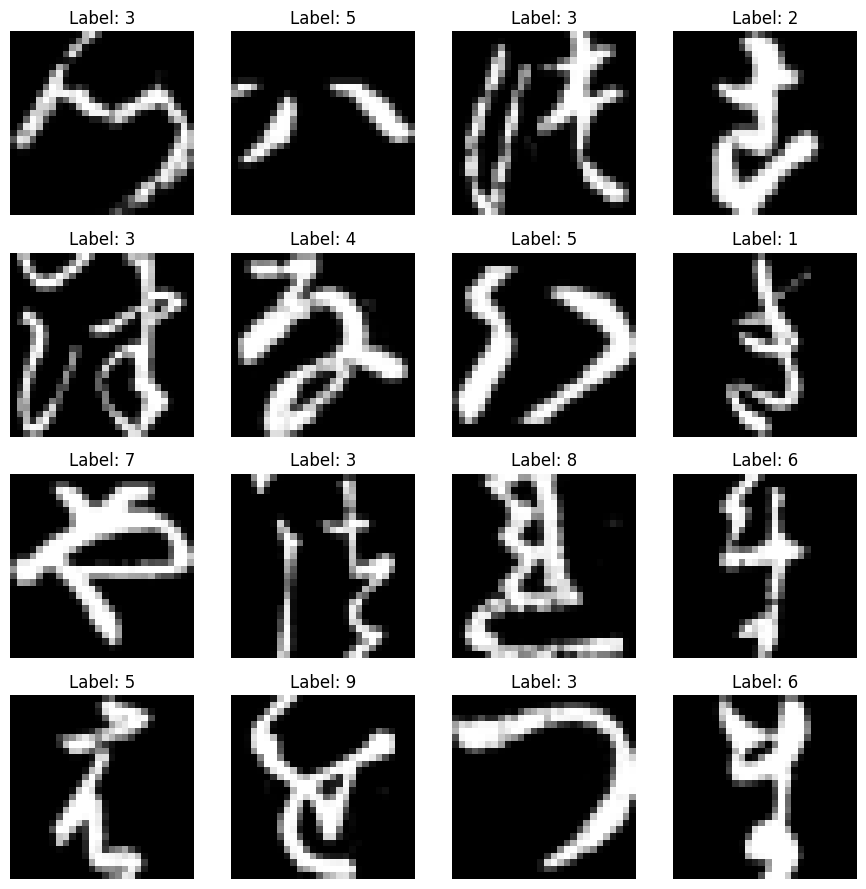

In [13]:
# Define the transformations
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the KMNIST dataset
train_dataset = KMNIST(root='./data', train=True, download=True, transform=transform)
valid_dataset = KMNIST(root='./data', train=False, download=True, transform=transform)

# Create the DataLoaders object
train_dl = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_dl = DataLoader(valid_dataset, batch_size=64)
dls = DataLoaders(train_dl, valid_dl)

# Set the number of images per row and column in the grid
n_row = 4
n_col = 4

# Get a batch of training data
images, labels = next(iter(train_dl))

# Create a grid of images and labels
fig, axs = plt.subplots(n_row, n_col, figsize=(9, 9))
for i in range(n_row):
    for j in range(n_col):
        ax = axs[i, j]
        img_idx = i * n_col + j
        img = images[img_idx].reshape(28, 28).numpy()  # Reshape the image to 28x28
        label = labels[img_idx].item()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')

plt.tight_layout()
plt.show()

#### **Step #2: Determine the dimensions of the data**


Determine the number of input neurons and if the data needs to be flattened.

In [5]:
images[0].shape

torch.Size([1, 28, 28])

#### **Steps #3 - 6: Build the Model**


Build a model sequentially such that there is:

* The Input Layer, flattened if necessary, correctly sized for the input
* No hidden layers
* The Output Layer with the correct number of neurons.

In [14]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 10)
)

#### **Step #7: Fit the model**

Fitting our model has three sub-steps:

**1. Define the loss function.** Since this is a classification problem, we will be using `nn.CrossEntropyLoss()`.

<br>

**2. Create the Learner object.** Provide the DataLoaders, model, loss function, and use the accuracy metric.

<br>

**3. Fit the model with the data: Set the number of training epochs and the batch size.** We would recommend starting with a small number of epochs (5) and increasing as necessary. A learning rate of 0.001 is a good starting value.

In [15]:
# Define the loss function
loss_function = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_function, metrics=accuracy)

# Train the model
learn.fit(5, lr=0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.620915,1.050980,0.687400,00:22
1,0.592037,1.011907,0.705000,00:24
2,0.605885,1.071349,0.691800,00:21
3,0.582827,1.064974,0.694900,00:22
4,0.585523,1.087134,0.683500,00:22


#### **Step #8: Evaluate the model**


Print the model's accuracy on both the training and validation sets.

In [16]:
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

Training accuracy: 0.8326


Validation accuracy: 0.6835


#### **Step #9: Visualize the model's predictions**


Now, run the code below to make predictions with the model and output its predictions for digits in the validation set.

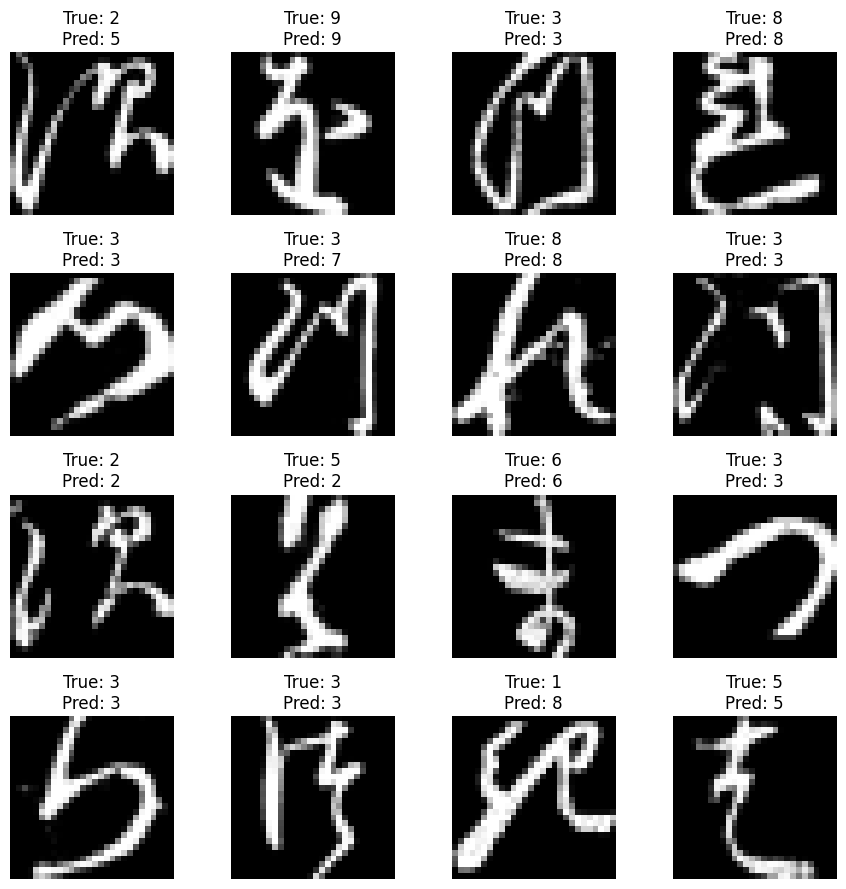

In [17]:
# Get a batch of validation data
images, labels = next(iter(valid_dl))

# Get the model's predictions for the batch
with torch.no_grad():
    outputs = model(images)
    pred_labels = torch.argmax(outputs, dim=1)

# Set the number of images per row and column in the grid
n_row = 4
n_col = 4

# Create a grid of images and labels
fig, axs = plt.subplots(n_row, n_col, figsize=(9, 9))
for i in range(n_row):
    for j in range(n_col):
        ax = axs[i, j]
        img_idx = i * n_col + j
        img = images[img_idx].reshape(28, 28).numpy()  # Reshape the image to 28x28
        true_label = labels[img_idx].item()
        pred_label = pred_labels[img_idx].item()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True: {true_label}\nPred: {pred_label}", fontsize=12)
        ax.axis('off')

plt.tight_layout()
plt.show()

<a name="p1.2"></a>

---
### **Part 1.2: Improvements**
---


Using the template cell provided below, create and train a neural network that is capable of achieving an 85% or higher accuracy on the validation dataset for classifying the Hiragana letters.

**Hint:** The first step to improving your work above is adding at least one Hidden Layer. However, you can also consider:
* Changing the number of neurons in each Hidden Layer
* Changing the activation functions in the Hidden Layers
* Changing the activation function in the Output Layer
* Training with a different learning rate
* Changing the number of training epochs

In [20]:
# BUILD
#=======
# Define the neural network architecture
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)


# FIT
#=====
# Define the loss function
loss_function = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_function, metrics=accuracy)

# Train the model
learn.fit(10, lr=0.0001)


# EVALUATE
#==========
# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

epoch,train_loss,valid_loss,accuracy,time
0,0.465654,0.829083,0.735900,00:24
1,0.360294,0.686905,0.780600,00:23
2,0.295214,0.624515,0.805600,00:24
3,0.254554,0.577779,0.819800,00:23
4,0.231133,0.547005,0.829100,00:24
5,0.202421,0.506235,0.845500,00:24
6,0.183825,0.494153,0.848800,00:24
7,0.178166,0.479243,0.854100,00:23
8,0.154161,0.472602,0.858700,00:24
9,0.143268,0.442782,0.868300,00:23


Training accuracy: 0.9656


Validation accuracy: 0.8683



Congratulations! You have completed the project. You should now know how to:

> Train, implement, and evaluate a deep learning image recognition model that is able to label images from the K-MNIST dataset with over 85% accuracy.  



---

<center>

### **Wait for Your Instructor to Continue**

---

<a name="p2"></a>

---
## **Part 2: Analysis of the MNIST Fashion Dataset**
---


![fashion_mnist](https://4.bp.blogspot.com/-OQZGt_5WqDo/Wa_Dfa4U15I/AAAAAAAAAUI/veRmAmUUKFA19dVw6XCOV2YLO6n-y_omwCLcBGAs/s1600/out.jpg)

(Image taken from the MNIST Fashion dataset.)

<br>

The MNIST Fashion dataset is a newer MNIST-like dataset containing images of Zalando's articles. Each training and test example is assigned to one of the following 10 labels: t-shirt/top, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, and ankle boot. Zalando sought to replace the original MNIST dataset.

Using deep learning, you will develop and evaluate various neural networks to train an AI in image recognition. This project will continue to challenge you to design your own neural networks and evaluate how your choices of hyperparameters impacted your models' accuracies.

<br>

**Your goal is to create a model that classifies the fashion items from the validation dataset with 85% accuracy or more.**

<a name="p2.1"></a>

---
### **Part 2.1: The Initial Attempt**
---


#### **Step #1: Import and split the dataset into a train/test set**

**Run the code below to import, split, and visualize the data.**

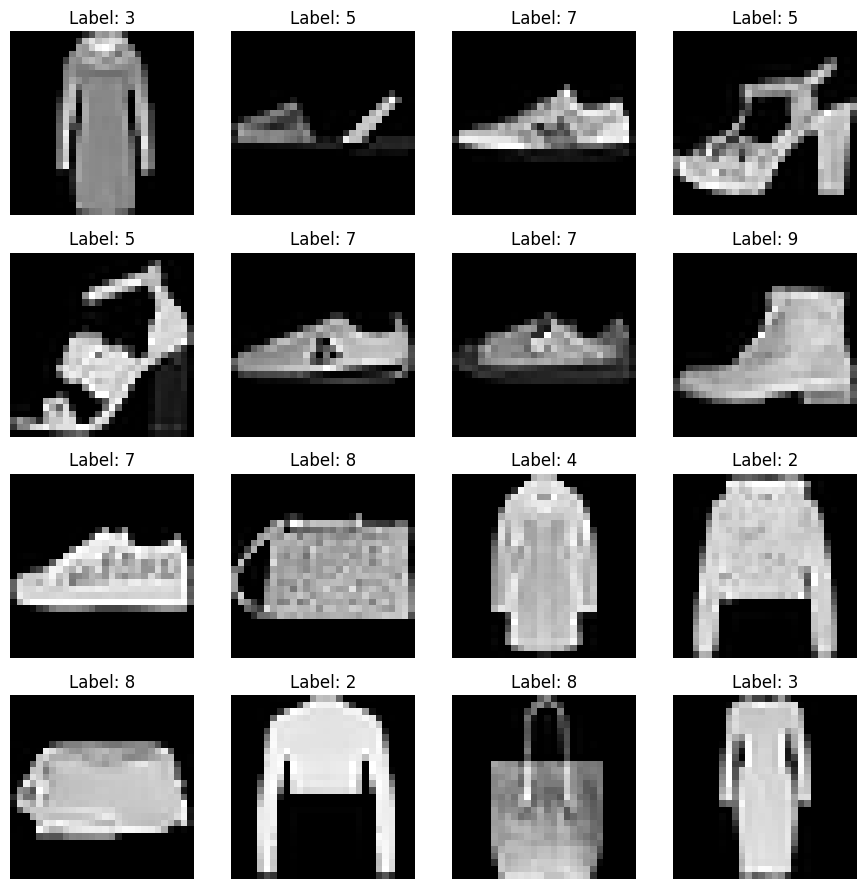

In [23]:
from torchvision.datasets import FashionMNIST
from sklearn.model_selection import train_test_split

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))
])

# Load the MNIST fashion dataset
train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
valid_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create the DataLoaders object
train_dl = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_dl = DataLoader(valid_dataset, batch_size=64)
dls = DataLoaders(train_dl, valid_dl)

# Set the number of images per row and column in the grid
n_row = 4
n_col = 4

# Get a batch of training data
images, labels = next(iter(train_dl))

# Create a grid of images and labels
fig, axs = plt.subplots(n_row, n_col, figsize=(9, 9))
for i in range(n_row):
    for j in range(n_col):
        ax = axs[i, j]
        img_idx = i * n_col + j
        img = images[img_idx].reshape(28, 28).numpy()  # Reshape the image to 28x28
        label = labels[img_idx].item()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')

plt.tight_layout()
plt.show()

#### **Step #2: Determine the dimensions of the data**


**Determine the number of input neurons and if the data needs to be flattened.**

In [22]:
images[0].shape

torch.Size([1, 28, 28])

#### **Steps #3 - 6: Build the Model**


Build a model sequentially such that there is:

* The Input Layer, flattened if necessary, and correctly sized for receiving inputs.
* No Hidden Layers
* The Output Layer with the correct number of neurons.

In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    # ADD YOUR LAYERS HERE
)

#### **Step #7: Fit the model**




In [ ]:
# Define the loss function

# Create the Learner object

# Train the model


#### **Step #8: Evaluate the model**


Print the model's accuracy on both the training and test sets as percentages.

#### **Step #9: Visualize the model's predictions**


Now, run the code below to make predictions with the model and output its predictions for items in the validation set.

In [ ]:
# Get a batch of validation data
val_images, val_labels = next(iter(valid_dl))

# Get model predictions for the validation batch
val_preds = learn.get_preds(dl=[(val_images, val_labels)])
val_pred_labels = torch.argmax(val_preds[0], dim=1)

# Set the number of images per row and column in the grid
n_row = 4
n_col = 4

# Create a grid of images and labels with predictions
fig, axs = plt.subplots(n_row, n_col, figsize=(9, 9))
for i in range(n_row):
    for j in range(n_col):
        ax = axs[i, j]
        img_idx = i * n_col + j
        img = val_images[img_idx].reshape(28, 28).numpy()  # Reshape the image to 28x28
        true_label = val_labels[img_idx].item()
        pred_label = val_pred_labels[img_idx].item()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True label: {true_label}\nPredicted label: {pred_label}")
        ax.axis('off')

plt.tight_layout()
plt.show()


<a name="p2.2"></a>

---
### **Part 2.2: Improvements**
---


Using the template cell provided below, create and train a neural network that is capable of achieving an 85% or higher accuracy on the test dataset for classifying the fashion items.

**Hint:** The first step to improving your work above is adding at least one Hidden Layer. However, you can also consider:
* Changing the number of neurons in each Hidden Layer
* Changing the activation functions in the Hidden Layers
* Changing the activation function in the Output Layer
* Training with a different optimizer
* Training with a different learning rate
* Changing the number of training epochs

In [ ]:
# BUILD
#=======
# Define the neural network architecture
model = nn.Sequential(
    # ADD YOUR LAYERS HERE
)



# FIT
#=====
# Define the loss function


# Create the Learner object


# Train the model




# EVALUATE
#==========
# Calculate training accuracy
train_loss, train_accuracy = # WRITE YOUR CODE HERE
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = # WRITE YOUR CODE HERE
print(f"Validation accuracy: {valid_accuracy:.4f}")

Congratulations! You have completed the project. You should now know how to:

* Train, implement, and evaluate a deep learning image recognition model that is able to label images from the MNIST-Fashion dataset with over 85% accuracy.


<br>

But, what's the **big picture** idea here? Well, let's think. What patterns did your analysis exhibit?

One thing that might be worth noting is that for each of the models that you generated and evaluated, the time it took for the model to finish training was quite lengthy.

Now, our datasets are relatively smaller compared to other deep learning implementations. **Access to memory resources and time pose challenges to neural network models** Are there ways of getting around this?

Yes and no, but that's okay! There do exist resources such as GPUs and network architectures like convolutional neural networks that allow us to make the best of modern capabilities. However, this is where a lot of science and AI research is currently at! Understanding and improving our use of neural networks.

You're now equipped with the tools to start exploring the world of neural networks and deep learning! **What will you train next?**

<a name="p3"></a>

---
## **[ADDITIONAL PRACTICE] Part 3: Analysis of Mineral Hardness**
---

Determining the hardness of minerals is vital for designing materials that may use them. In this section, you will build a regression model to predict the hardness of minerals based on their atomic properties.


<a name="p3.1"></a>

---
### **Part 3.1: The Initial Attempt**
---


#### **Step #1: Import and split the dataset into a train/test set**

**Run the code below to import, split, and visualize the data.**

In [24]:
from sklearn.model_selection import train_test_split

mineral_df = pd.read_csv('https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/material%20Mohs%20hardness/Mineral_Dataset.csv').drop(columns = 'Unnamed: 0')
mineral_df.head()

X = mineral_df.drop('Hardness', axis = 1)
y = mineral_df['Hardness']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the numpy arrays to PyTorch tensors with float32 data type
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_valid = torch.tensor(X_valid.values, dtype=torch.float32)
y_valid = torch.tensor(y_valid.values, dtype=torch.float32).unsqueeze(1)

# Create dataset object
train_ds = list(zip(X_train, y_train))
valid_ds = list(zip(X_valid, y_valid))

# Define the DataLoaders
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=64, shuffle=True)

dls = DataLoaders(train_dl, valid_dl)

#### **Step #2: Determine the dimensions of the data**


**Determine the number of input neurons and if the data needs to be flattened.**

In [25]:
X_train.shape

torch.Size([497, 11])

#### **Steps #3 - 6: Build the Model**


Build a model sequentially such that there is:

* The Input Layer, flattened if necessary, and correctly sized for receiving inputs.
* No Hidden Layers
* The Output Layer with the correct number of neurons such that we are predicting a continuous number.

In [26]:
# Define the neural network architecture
model = nn.Sequential(
    nn.Linear(11, 1) # ADD YOUR LAYERS HERE
)

#### **Step #7: Fit the model**

Remember that for:
* Regression tasks, we tend to use mse for the loss and rmse for the evaluation metric.
* Classification tasks, we tend to use cross entropy for the loss and accuracy for the evaluation metric.


In [27]:
# Define the loss function
loss_function = nn.MSELoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_function, metrics=[rmse])

# Train the model
learn.fit(5, lr=0.01)

epoch,train_loss,valid_loss,_rmse,time
0,25745.902344,21234.931641,145.722092,00:00
1,20199.210938,12268.678711,110.764069,00:00
2,15465.256836,6796.621094,82.441628,00:00
3,11978.675781,3046.518066,55.195267,00:00
4,9325.145508,1071.741333,32.737461,00:00


#### **Step #8: Evaluate the model**


Print the model's rmse on both the training and test sets.

In [28]:
# Calculate training rmse
train_preds, train_targets = learn.get_preds(dl = train_dl)
rmse_score = rmse(train_preds, train_targets)
print("Training RMSE:", rmse_score.item())

# Calculate validation rmse
valid_preds, valid_targets = learn.get_preds(dl = valid_dl)
rmse_score = rmse(valid_preds, valid_targets)
print("Validation RMSE:", rmse_score.item())

Training RMSE: 32.1865348815918


Validation RMSE: 32.737457275390625


#### **Step #9: Visualize the model's predictions**


Now, run the code below to make predictions with the model and output its predictions for items in the validation set.

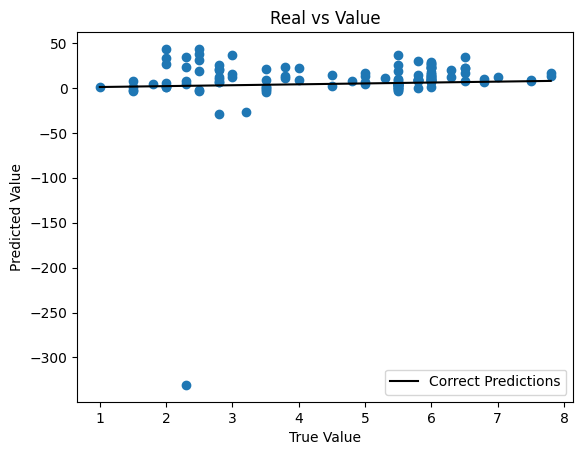

In [31]:
# Visualize comparison of predictions vs. actual values
plt.scatter(valid_targets, valid_preds)
plt.plot([valid_targets.min(), valid_targets.max()], [valid_targets.min(), valid_targets.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

<a name="p3.2"></a>

---
### **Part 3.2: Improvements**
---


Using the template cell provided below, create and train a neural network that is capable of achieving an 85% or higher accuracy on the test dataset for classifying the people.

**Hint:** The first step to improving your work above is adding at least one Hidden Layer. However, you can also consider:
* Changing the number of neurons in each Hidden Layer
* Changing the activation functions in the Hidden Layers
* Changing the activation function in the Output Layer
* Training with a different optimizer
* Training with a different learning rate
* Changing the number of training epochs

In [36]:
# BUILD
#=======
# Define the neural network architecture
model = nn.Sequential(
    nn.Linear(11, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)


# FIT
#=====
# Define the loss function
loss_function = nn.MSELoss()

# Create the Learner object
learn = Learner(dls, model, loss_function, metrics=[rmse])

# Train the model
learn.fit(20, lr=0.001)


# EVALUATE
#==========
# Calculate training rmse
train_preds, train_targets = learn.get_preds(dl=train_dl)
rmse_score = rmse(train_preds, train_targets)
print("Training RMSE:", rmse_score.item())

# Calculate validation rmse
valid_preds, valid_targets = learn.get_preds(dl=valid_dl)
rmse_score = rmse(valid_preds, valid_targets)
print("Validation RMSE:", rmse_score.item())

epoch,train_loss,valid_loss,_rmse,time
0,54.583904,19.026047,4.361886,00:00
1,35.896931,18.109314,4.255504,00:00
2,29.330791,16.036497,4.004560,00:00
3,25.253065,13.122473,3.622495,00:00
4,22.761274,9.594936,3.097569,00:00
5,20.144712,11.791644,3.433896,00:00
6,18.550720,9.481192,3.079154,00:00
7,17.236860,8.637724,2.939000,00:00
8,15.742739,7.294031,2.700746,00:00
9,14.290435,5.225406,2.285915,00:00


Training RMSE: 2.0065410137176514


Validation RMSE: 2.033604383468628


In [ ]:
-# Visualize comparison of predictions vs. actual values

# COMPLETE THIS CODE

<a name="p4"></a>

---
## **[ADDITIONAL PRACTICE] Part 4: Analysis of the Country211 Dataset**
---


The Country211 dataset is a [built-in pytorch dataset](https://pytorch.org/vision/main/generated/torchvision.datasets.Country211.html), also available originally from [OpenAI here](https://github.com/openai/CLIP/blob/main/data/country211.md) in which a variety of images are labeled by the country they were taken in.

<br>

This is largely the same task as you carried out in lab classifying variations of the MNIST dataset, but with the interesting twist that there are *many more* possible labels (unique countries): 211. As such, guessing a label at random would only have a 0.47% chance of being correct (a 0.0047 accuracy) .

<a name="p4.1"></a>

---
### **Part 4.1: The Initial Attempt**
---


#### **Step #1: Import and split the dataset into a train/test set**

**Run the code below to import, split, and visualize the data.**

In [ ]:
from torchvision.datasets import Country211

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))
])

# Load the dataset
train_dataset = Country211(root='./data', split='train', download=True, transform=transform)
valid_dataset = Country211(root='./data', split='test', download=True, transform=transform)

# Create the DataLoaders object
train_dl = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_dl = DataLoader(valid_dataset, batch_size=64)
dls = DataLoaders(train_dl, valid_dl)

In [ ]:
# Set the number of images per row and column in the grid
n_row = 3
n_col = 5

# Get a batch of training data
images, labels = next(iter(train_dl))

# Create a grid of images and labels
fig, axs = plt.subplots(n_row, n_col, figsize=(9, 9))
for i in range(n_row):
    for j in range(n_col):
        ax = axs[i, j]
        img_idx = i * n_col + j
        img = images[img_idx].numpy()
        img = np.transpose(img, (1, 2, 0))
        label = labels[img_idx].item()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')

plt.tight_layout()
plt.show()

#### **Step #2: Determine the dimensions of the data**


**Determine the number of input neurons and if the data needs to be flattened.**

#### **Steps #3 - 6: Build the Model**


Build a model sequentially such that there is:

* The Input Layer, flattened if necessary, and correctly sized for receiving inputs.
* No Hidden Layers
* The Output Layer with the correct number of neurons given that there are 5749 unique people in the dataset.

In [ ]:
# Define the neural network architecture
model = nn.Sequential(
    # ADD YOUR LAYERS HERE
)

#### **Step #7: Fit the model**

Remember that for:
* Regression tasks, we tend to use mse for the loss and rmse for the evaluation metric.
* Classification tasks, we tend to use cross entropy for the loss and accuracy for the evaluation metric.


In [ ]:
# Define the loss function

# Create the Learner object

# Train the model


#### **Step #8: Evaluate the model**


Print the model's accuracy on both the training and test sets as percentages.

#### **Step #9: Visualize the model's predictions**


Now, run the code below to make predictions with the model and output its predictions for items in the validation set.

In [ ]:
# Get a batch of validation data
val_images, val_labels = next(iter(valid_dl))

# Get model predictions for the validation batch
val_preds = learn.get_preds(dl=[(val_images, val_labels)])
val_pred_labels = torch.argmax(val_preds[0], dim=1)

# Set the number of images per row and column in the grid
n_row = 3
n_col = 5

# Create a grid of images and labels with predictions
fig, axs = plt.subplots(n_row, n_col, figsize=(9, 9))
for i in range(n_row):
    for j in range(n_col):
        ax = axs[i, j]
        img_idx = i * n_col + j
        img = val_images[img_idx].numpy()  # Reshape the image to 28x28
        img = np.transpose(img, (1, 2, 0))
        true_label = val_labels[img_idx].item()
        pred_label = val_pred_labels[img_idx].item()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True label: {true_label}\nPredicted label: {pred_label}")
        ax.axis('off')

plt.tight_layout()
plt.show()

<a name="p4.2"></a>

---
### **Part 4.2: Improvements**
---


Using the template cell provided below, create and train a neural network that is better than above. **NOTE**: With some tweaking (and a lot of time for training), we were able to get a little over 0.02 validation accuracy (and 0.05 training accuracy). While seemingly small, 0.02 is a 1/50 chance of being correct versus 1/211 if guessing randomly. However, if you are able to train a model to outperform this--let us know!

**Hint:** The first step to improving your work above is adding at least one Hidden Layer. However, you can also consider:
* Changing the number of neurons in each Hidden Layer
* Changing the activation functions in the Hidden Layers
* Changing the activation function in the Output Layer
* Training with a different optimizer
* Training with a different learning rate
* Changing the number of training epochs

In [ ]:
# BUILD
#=======
# Define the neural network architecture
model = nn.Sequential(
    # ADD YOUR LAYERS HERE
)



# FIT
#=====
# Define the loss function


# Create the Learner object


# Train the model




# EVALUATE
#==========
# Calculate training accuracy
train_loss, train_accuracy = # WRITE YOUR CODE HERE
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = # WRITE YOUR CODE HERE
print(f"Validation accuracy: {valid_accuracy:.4f}")

# End of notebook

---
© 2024 The Coding School, All rights reserved